# Lab-3 Template

Answer questions in the designated cells

## Preparation

Use dataset that is provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('C:/Users/navya/ml-spring-23/Scripts/SBA_loans_train.csv')
X_test  = pd.read_csv('C:/Users/navya/ml-spring-23/Scripts/SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [4]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [5]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [6]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [8]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [9]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [10]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

# Question 1 - point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [11]:
values_to_fill = {}

for col in X_train.columns:
    if X_train[col].isna().any() == True:
        print("Processing column and column type:", col,X_train[col].dtype)
        
        if pd.api.types.is_numeric_dtype(X_train[col].dtype):
            values_to_fill[col] = 0
        else:
            values_to_fill[col] = "Missing"
        

X_train.fillna(value=values_to_fill,inplace=True)
X_train.isna().sum()
        

Processing column and column type: City object
Processing column and column type: State object
Processing column and column type: Bank object
Processing column and column type: BankState object
Processing column and column type: NewExist float64
Processing column and column type: RevLineCr object
Processing column and column type: LowDoc object


City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
Defaulted            0
dtype: int64

In [12]:
values_to_fill = {}
X_test.fillna(value=values_to_fill,inplace=True)
for col in X_test.columns:
    if X_test[col].isna().any() == True:
        print("Processing column and column type:", col,X_test[col].dtype)
        
        if pd.api.types.is_numeric_dtype(X_test[col].dtype):
            values_to_fill[col] = 0
        else:
            values_to_fill[col] = "Missing"
X_test.fillna(value=values_to_fill,inplace=True)
X_test.isna().sum()

Processing column and column type: City object
Processing column and column type: State object
Processing column and column type: Bank object
Processing column and column type: BankState object
Processing column and column type: NewExist float64
Processing column and column type: RevLineCr object
Processing column and column type: LowDoc object


City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
Defaulted            0
dtype: int64

_## Question 2 - 5 point 
**Change on 2/4/2023 - Remove 20 values limitation from Lablel encoder.**

The question is asking to encode categorical variables. Because we are going to use Decision Tree apraoch in the Lab, we will not use One-Hot encoding. Instead, you are asked to Label encoding, Target encoding and Weight of Evidence encoding.
You will need to install `category_encoders` into your virtual environment by running below command after you have activated the environment:  
`!pip install category_encoders==2.6.0`  
  
In the next question you will be asked to try both approaches, and see which one performs better.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use three type of categorical variables encoders:  
- Use LabelEncoder to encode 
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html 
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html 

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new columns names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

In [12]:
!pip install category_encoders==2.6.0


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
len_data = len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
    if X_train[col].dtype == 'object':
        print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


In [14]:
# Label Encoding
X_train_le=X_train.copy()
X_train_te=X_train.copy()
X_train_woe=X_train.copy()
X_test_le=X_test.copy()
X_test_te=X_test.copy()
X_test_woe=X_test.copy()

#Label Encoding on training data
from sklearn.preprocessing import LabelEncoder
for col in ['City','State','Bank','BankState','RevLineCr','LowDoc']:
    enc = LabelEncoder()
#enc.fit(list(data[col])+list(data[col]))
    enc.fit(list(X_train_le[col]))
    X_train_le[col] = enc.transform(X_train_le[[col]])
X_train_le.head(30)

# Label Encoding on test data

from sklearn.preprocessing import LabelEncoder
for col in ['City','State','Bank','BankState','RevLineCr','LowDoc']:
    enc = LabelEncoder()
#enc.fit(list(data[col])+list(data[col]))
    enc.fit(list(X_test_le[col]))
    X_test_le[col] = enc.transform(X_test_le[[col]])
X_test_le.head(5)


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,10095,14,61866,574,14,0,84,1,2.0,0,0,1,0,4,7,42000.0,0.0,42000.0,33600.0,0
1,989,13,83704,3589,43,0,84,7,1.0,0,0,1,0,4,4,15000.0,0.0,15000.0,13500.0,0
2,1693,14,60188,2939,14,0,240,19,1.0,15,0,1,0,4,4,497000.0,0.0,497000.0,497000.0,0
3,11247,31,3878,772,31,235610,84,21,1.0,0,21,1,1,7,4,20000.0,0.0,20000.0,10000.0,0
4,1927,32,8002,772,41,541511,84,2,2.0,1,3,1,1,4,4,100000.0,0.0,100000.0,50000.0,0


In [15]:
# combining the train and test data, label encoding:
X_train_le=X_train.copy()
X_test_le=X_test.copy()
X_comb_le=X_train_le.append(X_test_le)
from sklearn.preprocessing import LabelEncoder
for col in ['City','State','Bank','BankState','RevLineCr','LowDoc']:
    enc = LabelEncoder()
#enc.fit(list(data[col])+list(data[col]))
    enc.fit(list(X_comb_le[col]))
    X_comb_le[col+"_le"] = enc.transform(X_comb_le[[col]])
X_comb_le.head(10)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted,City_le,State_le,Bank_le,BankState_le,RevLineCr_le,LowDoc_le
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1,10027,1,803,11,9,4
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1,19482,3,4997,5,9,4
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0,1058,21,381,23,2,7
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1,740,3,3292,4,13,4
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0,8869,18,708,20,2,7
5,BURNSVILLE,MN,55337,SPEDCO,MN,621330,240,2,1.0,4,2,1,1,0,N,266000.0,0.0,268000.0,268000.0,0,2277,23,4205,25,2,4
6,"COEUR D'ALENE,",ID,83814,"PANHANDLE AREA COUNCIL, INC.",ID,0,240,24,2.0,24,0,1,0,N,N,343000.0,0.0,343000.0,343000.0,0,3807,13,3566,15,9,4
7,TRENTON,NJ,8638,WELLS FARGO BANK NATL ASSOC,SD,0,12,5,1.0,0,0,1,0,T,N,25000.0,0.0,25000.0,12500.0,0,22055,32,4997,45,12,4
8,MIAMI,FL,33134,BANK OF AMERICA NATL ASSOC,NC,236118,48,1,2.0,0,1,0,1,N,N,10177.0,0.0,10000.0,5000.0,1,13324,9,407,30,9,4
9,WATERTOWN,MA,2472,CITIZENS BANK NATL ASSOC,RI,512110,60,4,1.0,0,4,0,1,N,N,50000.0,0.0,50000.0,25000.0,0,23181,19,1055,43,9,4


In [18]:
#Target Encoding
#"""
#Calculate frequency ratio of each column in relation to target variable Defaulted (on training dataset)
def targ_encoder(df,columnToEncode,target_column):
    x = columnToEncode
    '''Dictionary to store each zip value count'''
    total_val = pd.value_counts(df[x], dropna=True).to_dict()
    '''Dictionary to store each zip value count for each label value'''
    A = pd.value_counts(df[df[target_column]==0][x], dropna=True).to_dict()
    B = pd.value_counts(df[df[target_column]==1][x], dropna=True).to_dict()
    
    '''Calculate Ratio'''
    mean_dict = {}
    for key,val in total_val.items():
        mean_dict[key] = (A.get(key,0)*0 + B.get(key,0)*1)/(A.get(key,0)+B.get(key,0))
        
    '''Use zip/ratio dictionary to populate new column'''
    df[columnToEncode] = df[columnToEncode].map(mean_dict)
# perform target encoding on each of the categorical variables    
col= ["City","State","Bank","LowDoc","BankState","RevLineCr","LowDoc"]
for y in col:
    targ_encoder(X_train_te,y,"Defaulted")
    targ_encoder(X_test_te,y,"Defaulted")
X_train_te.head(5)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,0.380952,0.167744,35811,0.308181,0.158105,621310,73,1,2.0,2,1,0,1,0.146342,0.186457,25000.0,0.0,25000.0,21250.0,1
1,0.191919,0.200634,85254,0.138341,0.221678,0,84,3,2.0,0,0,0,0,0.146342,0.186457,52000.0,0.0,52000.0,46800.0,1
2,0.125984,0.096586,4401,0.062500,0.076696,323110,84,9,1.0,0,0,1,1,0.149252,0.090740,150000.0,0.0,150000.0,127500.0,0
3,0.375000,0.200634,85323,0.059406,0.068197,722110,27,20,1.0,0,20,10625,2,0.253136,0.186457,186959.0,0.0,100000.0,50000.0,1
4,0.276923,0.179574,70403,0.377778,0.101741,0,60,1,1.0,0,0,1,1,0.149252,0.090740,50000.0,0.0,50000.0,40000.0,0


In [19]:
import math
def woe_encoder(df,columnToEncode,target_column):
    x = columnToEncode
    # total_val to be used when calculating the percent of good and bad customers
    total_val = pd.value_counts(df[x], dropna=True).to_dict()
    totals= df.groupby(by=[target_column])[target_column].count().to_dict()
    tot_zero=totals[0]
    tot_ones=totals[1]

    # create 2 dictionaries to store the values of defaulters and non defaulters
    good = pd.value_counts(df[df[target_column]==0][x],dropna=True).to_dict()
    bad = pd.value_counts(df[df[target_column]==1][x], dropna=True).to_dict()
    ''' calculate % of good and bad customers ''' 
    mean_dict = {}
    for x in total_val:
        if good.get(x) :
            good_per = (good[x]/tot_zero)*100
        else:
            good_per = 0
        if bad.get(x) :
            bad_per = (bad[x]/tot_ones)*100
        else:
            bad_per = 0
        if bad_per == 0:
            mean_dict[x]= math.log1p(good_per)
        else:
            mean_dict[x]= math.log1p(good_per/bad_per)          
    df[columnToEncode] = df[columnToEncode].map(mean_dict)

In [20]:
col= ["City","State","Bank","LowDoc","BankState","RevLineCr","LowDoc"]
for y in col:
    woe_encoder(X_train_woe, y, "Defaulted")
    woe_encoder(X_test_woe, y, "Defaulted")
X_train_woe.head(5)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,0.296508,0.719704,35811,0.389884,0.756602,621310,73,1,2.0,2,1,0,1,0.806032,0.655832,25000.0,0.0,25000.0,21250.0,1
1,0.638862,0.613159,85254,0.842839,0.557187,0,84,3,2.0,0,0,0,0,0.806032,0.655832,52000.0,0.0,52000.0,46800.0,1
2,0.905650,1.094169,4401,1.431753,1.268916,323110,84,9,1.0,0,0,1,1,0.793311,1.140518,150000.0,0.0,150000.0,127500.0,0
3,0.303066,0.613159,85323,1.473168,1.361522,722110,27,20,1.0,0,20,10625,2,0.486541,0.655832,186959.0,0.0,100000.0,50000.0,1
4,0.441222,0.678240,70403,0.299985,1.056147,0,60,1,1.0,0,0,1,1,0.793311,1.140518,50000.0,0.0,50000.0,40000.0,0


## Question 3 - 5 points (small wording change on 2/4/2023)

Train decision tree models as below:
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

```
Train one model for every type of categorical encoding: Label, Target and WOE

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

In [21]:
X_comb_le_1=X_comb_le.drop(columns=["City","State","Bank","BankState","RevLineCr","LowDoc"])
test_le = X_comb_le_1.Defaulted

X_Comb_le=X_comb_le_1.drop(columns=['Defaulted'])
from sklearn.model_selection import train_test_split
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_Comb_le,test_le, random_state=0)


In [22]:
# Descision tree for label encoded dataset
from sklearn.tree import DecisionTreeClassifier
# fit the decision tree
dt1 = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=10)
dt1.fit(X_train_le,y_train_le)
print("Accuracy on training set: {:.3f}".format(dt1.score(X_train_le, y_train_le)))
print("Accuracy on test set: {:.3f}".format(dt1.score(X_test_le, y_test_le)))

Accuracy on training set: 0.933
Accuracy on test set: 0.928


In [24]:
# f1 score for label encoded dataset
from sklearn.metrics import f1_score
y_pred = dt1.predict(X_test_le)
f = f1_score(y_true = y_test_le , y_pred = y_pred,average = 'weighted')
print(f)
from sklearn.metrics import confusion_matrix
y_pred=dt1.predict(X_test_le)
y_true=y_test_le
cm=confusion_matrix(y_true,y_pred)
cm

0.9279379681428536


array([[89042,  3639],
       [ 4398, 15317]], dtype=int64)

In [25]:
# Decision tree for target encoded model
X_train_te_1=X_train_te.drop(columns=['Defaulted'])
X_test_te_1=X_test_te.drop(columns=['Defaulted'])
y_train_te=X_train_te.Defaulted
y_test_te=X_test.Defaulted

# fit the decision tree
dt2 = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=4)
dt2.fit(X_train_te_1,y_train_te)
print("Accuracy on training set: {:.3f}".format(dt2.score(X_train_te_1, y_train_te)))
print("Accuracy on test set: {:.3f}".format(dt2.score(X_test_te_1, y_test_te)))

Accuracy on training set: 0.897
Accuracy on test set: 0.899


In [26]:
# report the f1 score for dt2
from sklearn.metrics import f1_score
y_pred = dt2.predict(X_test_te_1)
f = f1_score(y_true = y_test_te , y_pred = y_pred,average = 'weighted')
print(f)
y_pred=dt2.predict(X_test_te_1)
y_true=y_test_te
cm=confusion_matrix(y_true,y_pred)
cm

0.8924741342193246


array([[89703,  2986],
       [ 8363, 11344]], dtype=int64)

In [27]:
# Decision tree for WOE encoded model
X_train_woe_1=X_train_woe.drop(columns=['Defaulted'])
X_test_woe_1=X_test_woe.drop(columns=['Defaulted'])
y_train_woe=X_train_woe.Defaulted
y_test_woe=X_test_woe.Defaulted

# fit the decision tree
dt3 = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=4)
dt3.fit(X_train_woe_1,y_train_woe)
print("Accuracy on training set: {:.3f}".format(dt3.score(X_train_woe_1, y_train_woe)))
print("Accuracy on test set: {:.3f}".format(dt3.score(X_test_woe_1, y_test_woe)))

Accuracy on training set: 0.891
Accuracy on test set: 0.887


In [28]:
# report the f1 score for dt3
from sklearn.metrics import f1_score
y_pred = dt3.predict(X_test_woe_1)
f = f1_score(y_true = y_test_woe , y_pred = y_pred,average = 'weighted')
print(f)
y_pred=dt3.predict(X_test_te_1)
y_true=y_test_woe
cm=confusion_matrix(y_true,y_pred)
cm

0.8875627389836024


array([[82119, 10570],
       [ 4798, 14909]], dtype=int64)

## Question 4 - 5 points

To answer this question, use categorical columns encoded with Target encoder only (Don't use Lable and WOE encoded columns).

Tune Decision Tree model to achieve best performance as measured by F1 score ("weighted").

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

Report best model parameters as measured by F1.  
Report best model F1 and confusion matrix.

In [29]:
def decTreesComparison(Xtrain_d,Xtest_d,Ytrain_d,Ytest_d,depth,splitVal,impurity):
    decisionT = DecisionTreeClassifier(max_depth=depth,min_samples_split=splitVal,min_impurity_decrease=impurity)
    decisionT.fit(Xtrain_d,Ytrain_d)
    # print("Accuracy on training set: {:.3f}".format(decisionT.score(Xtrain_d, Ytrain_d)),i,j,k)
    print("Accuracy on test set: {:.3f}".format(decisionT.score(Xtest_d, Ytest_d)),"Set is",i,j,k)
    y_pred = decisionT.predict(Xtest_d)
    f = f1_score(y_true = Ytest_d , y_pred = y_pred,average = 'weighted')
    print(f)

In [30]:
max_depth = [5,10,12,15,20]
min_samples_split = [25, 50, 75] 
min_impurity_decrease=[0.0, 0.02, 0.05] 
for i in max_depth:
    for j in min_samples_split:
        for k in min_impurity_decrease:
            decTreesComparison(X_train_te_1,X_test_te_1,y_train_te,y_test_te,i,j,k)

#the best set is 
from sklearn.metrics import confusion_matrix
y_pred=dt2.predict(X_test_te_1)
y_true=y_test_te
cm=confusion_matrix(y_true,y_pred)
cm

Accuracy on test set: 0.915 Set is 5 25 0.0
0.9119252585186995
Accuracy on test set: 0.848 Set is 5 25 0.02
0.8514579259765372
Accuracy on test set: 0.848 Set is 5 25 0.05
0.8514579259765372
Accuracy on test set: 0.915 Set is 5 50 0.0
0.9119252585186995
Accuracy on test set: 0.848 Set is 5 50 0.02
0.8514579259765372
Accuracy on test set: 0.848 Set is 5 50 0.05
0.8514579259765372
Accuracy on test set: 0.915 Set is 5 75 0.0
0.9119252585186995
Accuracy on test set: 0.848 Set is 5 75 0.02
0.8514579259765372
Accuracy on test set: 0.848 Set is 5 75 0.05
0.8514579259765372
Accuracy on test set: 0.934 Set is 10 25 0.0
0.9326458705630365
Accuracy on test set: 0.848 Set is 10 25 0.02
0.8514579259765372
Accuracy on test set: 0.848 Set is 10 25 0.05
0.8514579259765372
Accuracy on test set: 0.934 Set is 10 50 0.0
0.9327379018145223
Accuracy on test set: 0.848 Set is 10 50 0.02
0.8514579259765372
Accuracy on test set: 0.848 Set is 10 50 0.05
0.8514579259765372
Accuracy on test set: 0.933 Set is 10 7

array([[89703,  2986],
       [ 8363, 11344]], dtype=int64)

## Question 5 - 4 Points

Produce viszualization of the best model feature importances.
Calculate feature importance using permutation method.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
dt_best = DecisionTreeClassifier(max_depth=15,min_samples_split=50,min_impurity_decrease=0.0)
dt_best.fit(X_train_te_1,y_train_te)

DecisionTreeClassifier(max_depth=15, min_samples_split=50)

In [32]:
dt_best.feature_importances_

array([0.06987385, 0.00353744, 0.01681507, 0.17597696, 0.01459195,
       0.0111131 , 0.58137053, 0.00283595, 0.00246688, 0.00114476,
       0.00295879, 0.02457059, 0.03514819, 0.01631159, 0.00202862,
       0.01111884, 0.        , 0.00727874, 0.02085816])

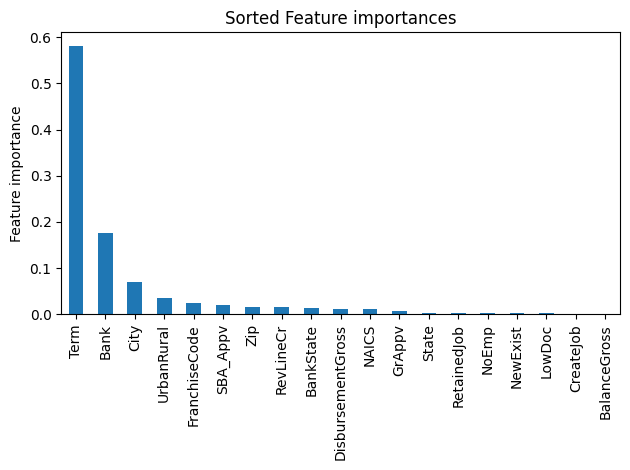

In [33]:
feature_names = X_train_te_1.columns
importances = dt_best.feature_importances_

tree_importances = pd.Series(importances, index=feature_names)
tree_importances = tree_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Feature importances")
ax.set_ylabel("Feature importance")
fig.tight_layout()

In [34]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    dt_best, X_test_te_1, y_test_te, n_repeats=100, random_state=42, n_jobs=4
)
tree_importances = pd.Series(result.importances_mean, index=feature_names)

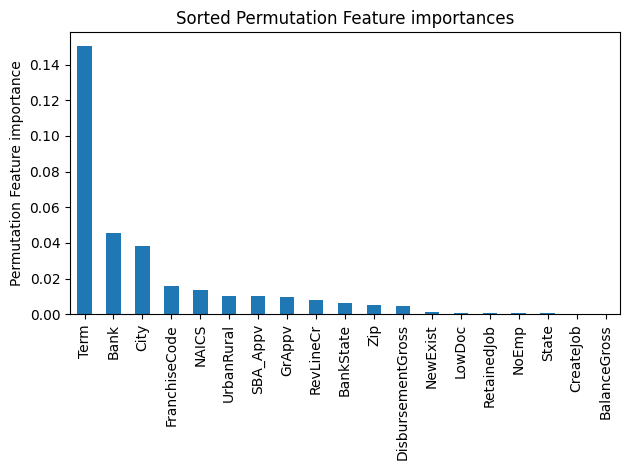

In [35]:
feature_names = X_train_te_1.columns
tree_importances = tree_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Permutation Feature importances")
ax.set_ylabel("Permutation Feature importance")
fig.tight_layout()